<a href="https://colab.research.google.com/github/greapis/jaeha-shim/blob/main/Building_vision_model_by_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **학습할 내용**


의류 기사를 인식하도록 신경망 학습시키기


네트워크의 다양한 레이어를 실험하는 과정을 안내하는 일련의 연습을 완료합니다.

## **빌드할 항목**

의류 물품을 식별하는 신경망

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


tf.keras.datasets MAPI에서는 Fashion MNIST 데이터를 제공합니다. 다음과 같이 로드합니다.

In [6]:
mnist = tf.keras.datasets.fashion_mnist

이 객체에서 load_data를 호출하면 두 가지 목록 모음인 학습 값과 테스트 값(의류 항목과 라벨을 표시하는 그래픽을 나타냄)을 제공합니다.

In [10]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

각 값의 모양 학습 이미지와 학습 라벨을 인쇄하여 확인합니다. 배열에서 다양한 색인을 실험해 볼 수 있습니다.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

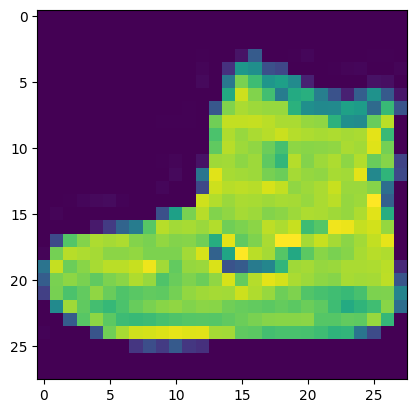

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

모든 값은 0~255의 정수인 것을 알 수 있습니다. 신경망을 학습시킬 때 모든 값을 0과 1 사이의 값으로 쉽게 처리하는 정규화라고 합니다. 다행히 Python은 반복 없이 이러한 목록을 정규화하는 쉬운 방법을 제공합니다.

In [13]:
training_images = training_images / 255.0
test_images = test_images / 255.0

색인 0의 부팅과 다른 부팅인 42를 살펴보는 것도 좋습니다.

이제 학습과 테스트라는 두 가지 데이터 세트가 있는 이유가 궁금할 수 있습니다.

모델을 아직 분류하지 못했을 때와 학습용으로 아직 다른 데이터 세트를 사용하여 분류가 얼마나 잘 되었는지 확인할 수 있습니다. 실제로 완료되면 다시 보지 못했던 데이터로 모델을 사용하고 싶을 것입니다. 또한 별도의 테스트 데이터가 없으면 네트워크에서 지식을 일반화하지 않고 학습 데이터만 기억할 위험이 있습니다.

**3. 모델 설계**


이제 모델을 디자인합니다. 3개의 레이어가 있습니다. 하나씩 살펴보고 다양한 유형의 레이어와 각 레이어에 사용되는 매개변수를 살펴봅니다.

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



*   Sequential은 신경망의 레이어 시퀀스를 정의합니다.
*   Flatten는 정사각형을 사용하여 1차원 벡터로 변환합니다


*   Dense은 뉴런의 레이어를 추가합니다.
*   Activation 함수는 각 뉴런 레이어에 해야 할 일을 알려줍니다. 많은 옵션이 있지만 지금은 다음을 사용하세요.


*   Relu가 X가 0보다 큰 경우 X를 반환하고 그렇지 않으면 0을 반환한다는 의미입니다. 0 이상의 값만 네트워크의 다음 레이어로 전달됩니다.
*   Softmax는 일련의 값을 사용하여 가장 큰 값을 선택합니다. 예를 들어 마지막 레이어의 출력이 [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]와 같이 표시되면 가장 큰 값을 정렬하지 않아도 되므로 [0,0,0,0,1,0,0,0]0을 반환합니다.





